In [109]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import ensemble
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn import ensemble
import itertools
from sklearn.model_selection import train_test_split
import time
import numpy as np
from sklearn.ensemble import ExtraTreesClassifier
from sklearn import linear_model
from sklearn.decomposition import PCA 
from sklearn.metrics import confusion_matrix
from sklearn.feature_selection import RFE

pd.set_option('display.height', 1000)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

height has been deprecated.



In [3]:
#Import data
data = pd.read_csv("bank-additional-full.csv", delimiter=";")

In [4]:
data.shape

(41188, 21)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
y                 41188 non-null object
dtypes: float64(5), int64(5), object(11)
memory usa

In [125]:
data.head(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,outcome
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0.0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0.0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0.0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0.0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0.0


### Feature Engineering and Selection

In [140]:
# Final Model Features

#Create Outcome
data.loc[data.y == "yes", "outcome"] = 1
data.loc[data.y == "no", "outcome"] = 0
y = data["outcome"]

#Feature Engineering

x["pdays"] = data["pdays"]
x["previous"] = data["previous"]
x["below 40"] = np.where(data.age <40,1,0)
x["prior_outcome"] = np.where(data["poutcome"] == "yes",1,0)
x["single"] = np.where(np.logical_or(data["marital"] =="single",data["marital"] =="uknown"),1,0)
x["loan_yes"] = np.where(data["loan"] == "yes",1,0)
x["default_no"] = np.where(data["default"] == "yes",1,0)

#Split for modeling
x_train, x_test, y_train, y_test = train_test_split(x,y, random_state=22)

In [182]:
#Features for RFE and Random Forest Feature Importance - Will Include All Features

# Create Outcome
data.loc[data.y == "yes", "outcome"] = 1
data.loc[data.y == "no", "outcome"] = 0

x_full = pd.get_dummies(data[["loan","contact","day_of_week","poutcome","marital","education","default","month"]])
x_full["duration"] = data["duration"]
x_full["campaign"] = data["campaign"]
x_full["pdays"] = data["pdays"]
x_full["previous"] = data["previous"]
y_full = data["outcome"]

x_train_full, x_test_full, y_train_full, y_test_full = train_test_split(x_full,y_full, random_state=22)

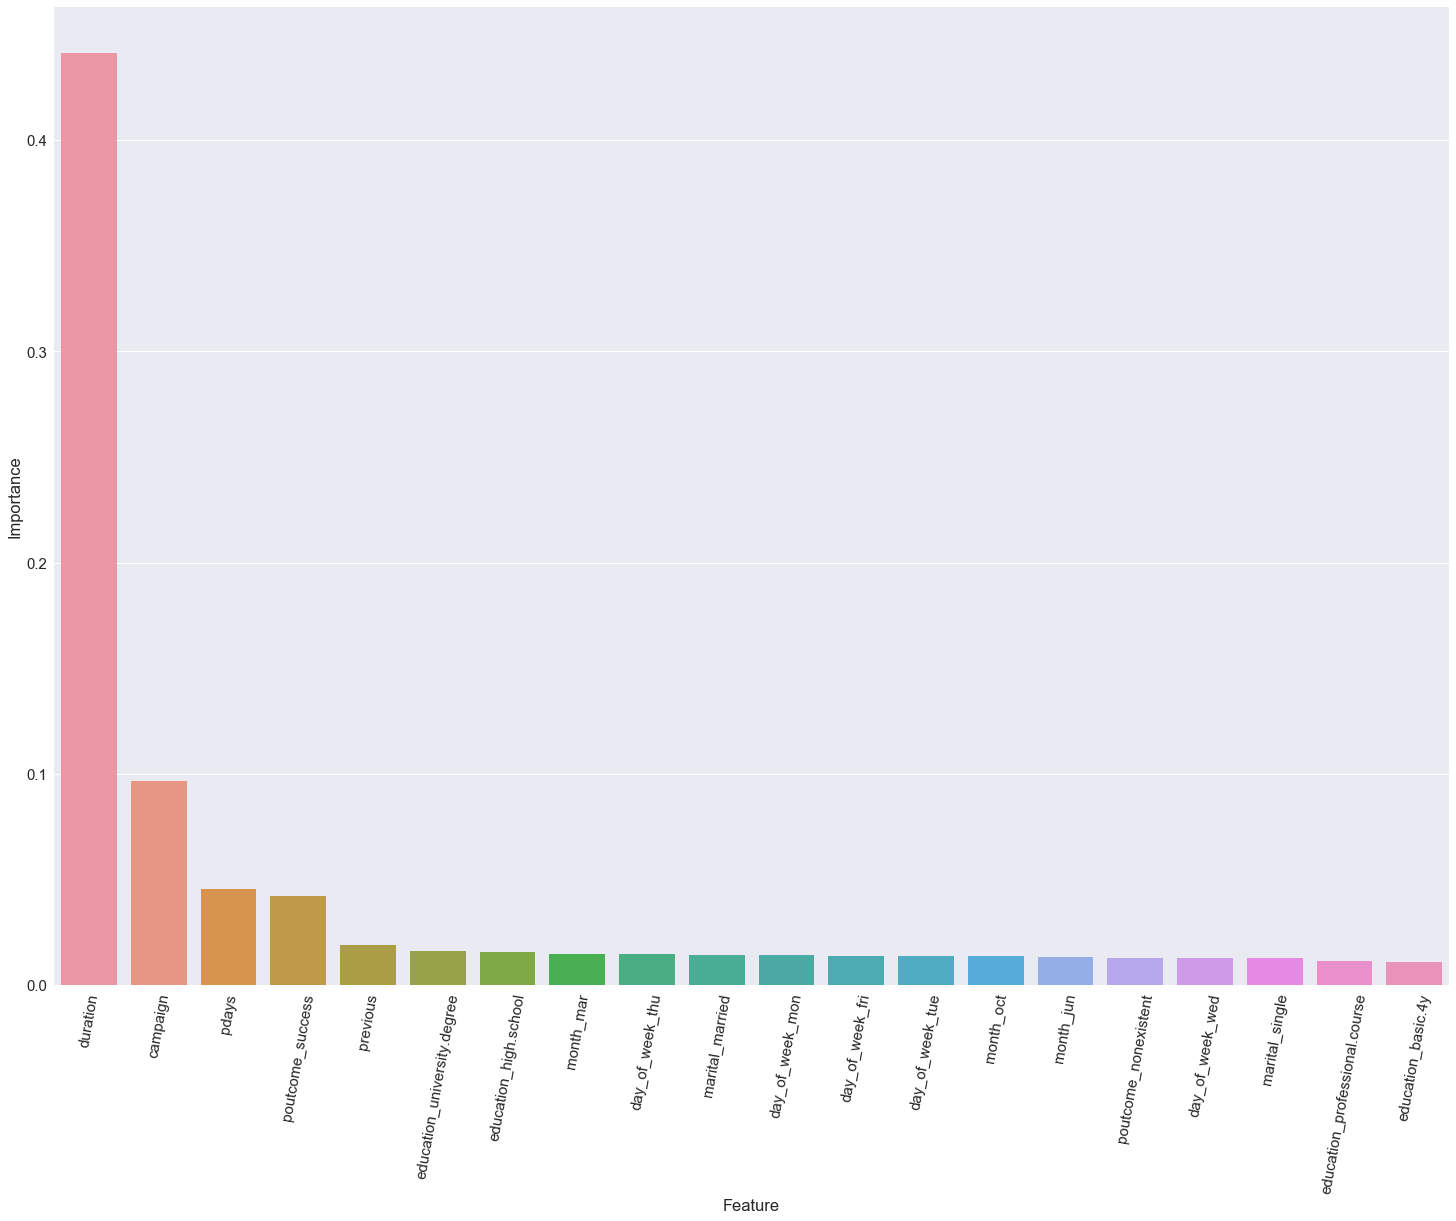

In [183]:
#Random Forest for Feature Selection

forest = ExtraTreesClassifier(n_estimators=20)
forest.fit(x_train_full, y_train_full)
feature_importances = forest.feature_importances_

importances = pd.DataFrame({'Importance': feature_importances, 'Feature': x_train.columns}, 
                           index=x_train.columns).sort_values(by='Importance', ascending=False)

sns.set(font_scale=1.50)
plt.figure(figsize=(25, 18))
plt.xticks(rotation=80)
plot=sns.barplot(x='Feature', y='Importance', data=importances[0:20])
fig = plot.get_figure()
fig.savefig("output7.png")
plt.show()

In [168]:
#Try without dummy variables - then feature engineered - try other models
#RFE for feature selectiondd
selector = RFE(LogisticRegression())
selector = selector.fit(x_full,y_full)
rankings = pd.DataFrame({'Features': x_full.columns, 'Ranking' : selector.ranking_})
rankings.sort_values('Ranking')

,Features,Ranking
41,previous,1
19,education_basic.9y,1
26,default_unknown,1
27,default_yes,1
29,month_aug,1
30,month_dec,1
31,month_jul,1
33,month_mar,1
12,poutcome_success,1
11,poutcome_nonexistent,1


## Modeling

In [12]:
def print_model_output(input_model):
    start_time = time.time()
    model=input_model
    model.fit(x_train,y_train)
    train_score=model.score(x_train,y_train)
    test_score=model.score(x_test,y_test)
    predict_test=model.predict(x_test)
    #print(confusion_matrix(y_test,predict_test))
    matrix = confusion_matrix(y_test,predict_test)
    test_accuracy=matrix[0][0]/(matrix[0][0]+matrix[0][1])
    test_specificity = matrix[1][1]/(matrix[1][0]+matrix[1][1])
    #print("Train Score %0.6f" % (train_score))
    #print("Test Score %0.6f" % (test_score)) 
    #print("Test Sensitivity %0.6f" % (test_accuracy))
    #print("Test Specificity %0.6f" % (test_specificity))
    #print("Cross-Val-Score:")
    #print(cross_val_score(model,x_train,y_train))
    return train_score, test_score,test_accuracy,test_specificity

In [158]:
def print_model_output_single(input_model):
    start_time = time.time()
    model=input_model
    model.fit(x_train,y_train)
    train_score=model.score(x_train,y_train)
    test_score=model.score(x_test,y_test)
    predict_test=model.predict(x_test)
    matrix = confusion_matrix(y_test,predict_test)
    print(matrix)
    test_accuracy=matrix[0][0]/(matrix[0][0]+matrix[0][1])
    test_specificity = matrix[1][1]/(matrix[1][0]+matrix[1][1])
    print("Train Score %0.6f" % (train_score))
    print("Test Score %0.6f" % (test_score)) 
    print("Test Sensitivity %0.6f" % (test_accuracy))
    print("Test Specificity %0.6f" % (test_specificity))
    #print("Cross-Val-Score:")
    #print(cross_val_score(model,x_train,y_train))
    return train_score, test_score,test_accuracy,test_specificity

In [72]:
def print_model_output_single(input_model):
    start_time = time.time()
    model=input_model
    model.fit(x_train,y_train)
    train_score=model.score(x_train,y_train)
    test_score=model.score(x_test,y_test)
    predict_test=model.predict(x_test)
    #matrix = confusion_matrix(y_test,predict_test)
    #test_accuracy=matrix[0][0]/(matrix[0][0]+matrix[0][1])
    #test_specificity = matrix[1][1]/(matrix[1][0]+matrix[1][1])
    print("Train Score %0.6f" % (train_score))
    print("Test Score %0.6f" % (test_score)) 
    #print("Test Sensitivity %0.6f" % (test_accuracy))
    #print("Test Specificity %0.6f" % (test_specificity))
    #print("Cross-Val-Score:")
    #print(cross_val_score(model,x_train,y_train))
    return train_score, test_score,test_accuracy,test_specificity

In [169]:
def print_model_output_backwards(input_model):
    start_time = time.time()
    model=input_model
    model.fit(x_train,y_train)
    test_score=model.score(x_test,y_test)
    print("Test Score %0.6f" % (test_score)) 

In [144]:
# KNN with Default settings
start_time = time.time()
print_model_output_single(KNeighborsClassifier())
print("Runtime: %0.f seconds" % (time.time()- start_time))

Train Score 0.898320
Test Score 0.892202
Test Sensitivity 0.989906
Test Specificity 0.139476
Runtime: 10 seconds


In [ ]:
#Tuned KNN with weights
neighbors=range(1,102)
start_time = time.time()
knn_1_results = pd.DataFrame(columns=["Number Neighbors","Train Score","Test Score","Test Sensitivity","Test Specificity"])
for neighbor in neighbors:
    #print("Number of Neighbors %0.f" %(neighbor))
    train_score, test_score,test_accuracy,test_specificity=print_model_output(KNeighborsClassifier(n_neighbors=neighbor,weights="distance"))
    knn_1_results =  knn_1_results.append({"Number Neighbors":neighbor, "Train Score":train_score, "Test Score":test_score,"Test Sensitivity":test_accuracy,"Test Specificity":test_specificity}, ignore_index=True)
knn_1_results = knn_1_results.sort_values(by="Test Specificity", ascending=False)
print(knn_1_results)
print("Runtime: %0.f seconds" % (time.time()- start_time))

     Number Neighbors  Train Score  Test Score  Test Sensitivity  Test Specificity
2                 3.0     0.861675    0.852870          0.938337          0.194421
4                 5.0     0.864103    0.856075          0.942177          0.192730
0                 1.0     0.858308    0.848208          0.934826          0.180896
95               96.0     0.905474    0.894824          0.988918          0.169907
99              100.0     0.905474    0.894824          0.988918          0.169907
97               98.0     0.905474    0.894824          0.988918          0.169907
96               97.0     0.905474    0.894824          0.988918          0.169907
100             101.0     0.905474    0.894824          0.988918          0.169907
3                 4.0     0.863326    0.855103          0.944042          0.169907
98               99.0     0.905474    0.894630          0.988918          0.168216
88               89.0     0.905474    0.894435          0.988808          0.167371
89  

In [14]:
#Tuned KNN without weights
neighbors=range(1,102)
start_time = time.time()
knn_1_results = pd.DataFrame(columns=["Number Neighbors","Train Score","Test Score","Test Sensitivity","Test Specificity"])
for neighbor in neighbors:
    #print("Number of Neighbors %0.f" %(neighbor))
    train_score, test_score,test_accuracy,test_specificity=print_model_output(KNeighborsClassifier(n_neighbors=neighbor))
    knn_1_results =  knn_1_results.append({"Number Neighbors":neighbor, "Train Score":train_score, "Test Score":test_score,"Test Sensitivity":test_accuracy,"Test Specificity":test_specificity}, ignore_index=True)
knn_1_results = knn_1_results.sort_values(by="Test Specificity", ascending=False)
print(knn_1_results)
print("Runtime: %0.f seconds" % (time.time()- start_time))

     Number Neighbors  Train Score  Test Score  Test Sensitivity  Test Specificity
96               97.0     0.898255    0.895309          0.984420          0.208791
94               95.0     0.898158    0.895309          0.984420          0.208791
92               93.0     0.898223    0.895309          0.984420          0.208791
91               92.0     0.898255    0.895309          0.984420          0.208791
90               91.0     0.898255    0.895309          0.984420          0.208791
84               85.0     0.898352    0.895504          0.984749          0.207946
95               96.0     0.898320    0.895212          0.984420          0.207946
93               94.0     0.898288    0.895212          0.984420          0.207946
100             101.0     0.898288    0.895212          0.984529          0.207101
99              100.0     0.898288    0.895212          0.984529          0.207101
98               99.0     0.898255    0.895212          0.984529          0.207101
97  

### Logistic Regression

In [159]:
#Logistic Regression
start_time = time.time()
print_model_output_single(LogisticRegression(C=1e09,penalty="l2"))
print("Runtime: %0.f seconds" % (time.time()- start_time))

[[8972  142]
 [ 936  247]]
Train Score 0.898255
Test Score 0.895309
Test Sensitivity 0.984420
Test Specificity 0.208791
Runtime: 0 seconds


In [149]:
#Logistic Regression With Weights
start_time = time.time()
print_model_output_single(LogisticRegression(C=1e09,penalty="l2",class_weight="balanced"))
print("Runtime: %0.f seconds" % (time.time()- start_time))

Train Score 0.822149
Test Score 0.821404
Test Sensitivity 0.887755
Test Specificity 0.310228
Runtime: 0 seconds


In [104]:
#Ridge Regression No Weights
start_time = time.time()
print_model_output_single(LogisticRegression(C=1,penalty="l2"))
print("Runtime: %0.f seconds" % (time.time()- start_time))

Train Score 0.898255
Test Score 0.895309
Test Sensitivity 0.984420
Test Specificity 0.208791
Cross-Val-Score:
[ 0.89745582  0.89841701  0.89889277]
Runtime: 0 seconds


In [105]:
#Ridge Regression with weights
start_time = time.time()
print_model_output_single(LogisticRegression(C=1,penalty="l2",class_weight="balanced"))
print("Runtime: %0.f seconds" % (time.time()- start_time))

Train Score 0.822149
Test Score 0.821404
Test Sensitivity 0.887755
Test Specificity 0.310228
Cross-Val-Score:
[ 0.86851816  0.82286103  0.8235237 ]
Runtime: 0 seconds


In [151]:
#Lasso Regression No Weights
start_time = time.time()
print_model_output_single(LogisticRegression(C=1,penalty="l1"))
print("Runtime: %0.f seconds" % (time.time()- start_time))

Train Score 0.898255
Test Score 0.895309
Test Sensitivity 0.984420
Test Specificity 0.208791
Runtime: 0 seconds


In [150]:
#Lasso Regression with Weights
start_time = time.time()
print_model_output_single(LogisticRegression(C=1,penalty="l1",class_weight="balanced"))
print("Runtime: %0.f seconds" % (time.time()- start_time))

Train Score 0.822149
Test Score 0.821404
Test Sensitivity 0.887755
Test Specificity 0.310228
Runtime: 0 seconds


In [73]:
#Lasso Regression - Using Lasso Function
start_time = time.time()
print_model_output_single(lass)
print("Runtime: %0.f seconds" % (time.time()- start_time))

Train Score 0.105649
Test Score 0.104255
Runtime: 0 seconds


In [74]:
#Manual lasso model with coefficients
lass = linear_model.Lasso(alpha=1)
lassfit = lass.fit(x_train,y_train)
lass_score=lass.score(x_train,y_train)
lass_test_score=lass.score(x_test,y_test)
print("Score: %0.6f" % (lass_score))
print("Test Score: %0.6f" % (lass_test_score))
origparams = np.append(lassfit.coef_,lassfit.intercept_)
print(origparams)

Score: 0.105649
Test Score: 0.104255
[ -5.22494858e-04   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00  -0.00000000e+00  -0.00000000e+00   6.14969717e-01]


### Random Forest

In [18]:
#Random Forest
estimators= (5,10,50,100,250,500,1000,2000,3000,4000,5000,10000)
start_time = time.time()
rf_results = pd.DataFrame(columns=["Estimators","Train Score","Test Score","Test Sensitivity","Test Specificity"])
for estimator in estimators:
    #print("Estimator: %0.f" %(estimator))
    train_score, test_score,test_accuracy,test_specificity=print_model_output(ensemble.RandomForestClassifier(n_estimators=estimator,max_features="auto"))
    rf_results =  rf_results.append({"Estimators":estimator, "Train Score":train_score, "Test Score":test_score,"Test Sensitivity":test_accuracy,"Test Specificity":test_specificity}, ignore_index=True)
rf_results = rf_results.sort_values(by="Test Specificity", ascending=False).reset_index()
print(rf_results)
print("Runtime: %0.f seconds" % (time.time()- start_time))

    index  Estimators  Train Score  Test Score  Test Sensitivity  Test Specificity
0       6      1000.0     0.901266    0.895309          0.988370          0.178360
1       9      4000.0     0.901266    0.894921          0.987931          0.178360
2       7      2000.0     0.901266    0.895212          0.988370          0.177515
3       1        10.0     0.900974    0.895115          0.988370          0.176669
4      11     10000.0     0.901266    0.894921          0.988150          0.176669
5       2        50.0     0.901266    0.895115          0.988479          0.175824
6       3       100.0     0.901266    0.895115          0.988479          0.175824
7       8      3000.0     0.901266    0.895115          0.988479          0.175824
8      10      5000.0     0.901266    0.895018          0.988370          0.175824
9       4       250.0     0.901266    0.894727          0.988260          0.174134
10      5       500.0     0.901266    0.894824          0.988370          0.174134
11  

### KNN

In [ ]:
#Tuned KNN without weights
neighbors=range(1,5)
start_time = time.time()
results = pd.DataFrame(columns=["Number Neighbors","Train Score","Test Score","Test Sensitivity","Test Specificty"])
for neighbor in neighbors:
    #print("Number of Neighbors %0.f" %(neighbor))
    train_score, test_score,test_accuracy,test_specificity=print_model_output(KNeighborsClassifier(n_neighbors=neighbor))
    knn_1_results =  knn_1_results.append({"Number Neighbors":neighbor, "Train Score":train_score, "Test Score":test_score,"Test Sensitivity":test_accuracy,"Test Specificty":test_specificity}, ignore_index=True)
knn_1_results = knn_1_results.sort_values(by="Test Specificity", ascending=False)
print(knn_1_results)
print("Runtime: %0.f seconds" % (time.time()- start_time))

In [106]:
rf_results_2 = rf_results.sort_values(by="Test Score", ascending=False).reset_index()
print(rf_results_2)

    level_0  index  Estimators  Train Score  Test Score  Test Sensitivity  Test Specificity
0         0      6      1000.0     0.901266    0.895309          0.988370          0.178360
1         2      7      2000.0     0.901266    0.895212          0.988370          0.177515
2         3      1        10.0     0.900974    0.895115          0.988370          0.176669
3         5      2        50.0     0.901266    0.895115          0.988479          0.175824
4         6      3       100.0     0.901266    0.895115          0.988479          0.175824
5         7      8      3000.0     0.901266    0.895115          0.988479          0.175824
6         8     10      5000.0     0.901266    0.895018          0.988370          0.175824
7         1      9      4000.0     0.901266    0.894921          0.987931          0.178360
8         4     11     10000.0     0.901266    0.894921          0.988150          0.176669
9        10      5       500.0     0.901266    0.894824          0.988370       

### Gradient Boost Model

In [19]:
def boosted_model(loss,estimators,depth):
    model = ensemble.GradientBoostingClassifier(loss=loss,n_estimators=estimators,max_depth=depth)
    return model

In [33]:
#Boosted Model
loss_types=("deviance","exponential")
max_depth_list = (3,4,5,6,7,8)
estimators_list= (1,2,3,4,5,6,7,8,9,10,50,100,200,300,400,500,600,700,800,900,1000)
start_time = time.time()
boost_results = pd.DataFrame(columns=["Loss","Depth","Estimators","Train Score","Test Score","Test Sensitivity","Test Specificity"])
for (boost_loss,boost_estimators,boost_depth) in itertools.product(loss_types,estimators_list,max_depth_list):
    train_score, test_score,test_accuracy,test_specificity=print_model_output(boosted_model(boost_loss,boost_estimators,boost_depth))
    boost_results =  boost_results.append({"Loss":boost_loss,"Depth":boost_depth,"Estimators":boost_estimators, "Train Score":train_score, "Test Score":test_score,"Test Sensitivity":test_accuracy,"Test Specificity":test_specificity}, ignore_index=True)
boost_results = boost_results.sort_values(by="Test Specificity", ascending=False).reset_index()
print(boost_results)
print("Runtime: %0.f seconds" % (time.time()- start_time))

     index         Loss Depth Estimators  Train Score  Test Score  Test Sensitivity  Test Specificity
0       67     deviance     4        100     0.900197    0.895406          0.987053          0.189349
1       61     deviance     4         50     0.899809    0.895018          0.986724          0.188504
2      193  exponential     4        100     0.900003    0.894824          0.986614          0.187658
3       60     deviance     3         50     0.899518    0.895115          0.987163          0.185968
4      187  exponential     4         50     0.899615    0.894921          0.986943          0.185968
5      192  exponential     3        100     0.899550    0.895115          0.987163          0.185968
6      188  exponential     5         50     0.900165    0.894727          0.986833          0.185123
7      189  exponential     6         50     0.900521    0.895018          0.987163          0.185123
8      198  exponential     3        200     0.899841    0.895309          0.98749

In [102]:
boost_results_2 = boost_results.sort_values(by="Test Score", ascending=False).reset_index()
print(boost_results.head(5))

   index         Loss Depth Estimators  Train Score  Test Score  Test Sensitivity  Test Specificity
0     67     deviance     4        100     0.900197    0.895406          0.987053          0.189349
1     61     deviance     4         50     0.899809    0.895018          0.986724          0.188504
2    193  exponential     4        100     0.900003    0.894824          0.986614          0.187658
3     60     deviance     3         50     0.899518    0.895115          0.987163          0.185968
4    187  exponential     4         50     0.899615    0.894921          0.986943          0.185968


### Support Vector

In [34]:
#SVC
def SVC_model(k):
    svc= SVC(kernel=k)
    model = svc
    return model

In [45]:
start_time = time.time()
print_model_output_single(SVC(kernel="linear"))
print("Runtime: %0.f seconds" % (time.time()- start_time))

Train Score 0.898255
Test Score 0.895309
Test Sensitivity 0.984420
Test Specificity 0.208791
Runtime: 111 seconds


### Logistic with PCA

In [161]:
sklearn_pca = PCA(n_components=1)
x_train_pca = sklearn_pca.fit_transform(x_train)
print('The percentage of total variance in the dataset explained by each','component from Sklearn PCA.\n',sklearn_pca.explained_variance_ratio_
)

The percentage of total variance in the dataset explained by each component from Sklearn PCA.
 [ 0.99997868]


In [85]:
print(x_train_pca)

[[ -36.1962259 ]
 [ -36.19467782]
 [ 952.80403133]
 ..., 
 [ -36.19632204]
 [ -36.19477853]
 [ -36.19633244]]


In [155]:
#Logistic with PCA feature
log_model=LogisticRegression(C=1,penalty="l2",class_weight="balanced")
log_model.fit(x_train_pca,y_train)
x_test_pca = sklearn_pca.transform(x_test)

log_predict_test=log_model.predict(x_test_pca)
#train_score=model.score(x_train,y_train)
log_test_score=log_model.score(x_test_pca,y_test)
log_matrix = confusion_matrix(y_test,log_predict_test)
log_test_accuracy=log_matrix[0][0]/(log_matrix[0][0]+log_matrix[0][1])
log_test_specificity = log_matrix[1][1]/(log_matrix[1][0]+log_matrix[1][1])
#print("Train Score %0.6f" % (train_score))
print("Test Score %0.6f" % (log_test_score)) 
print("Test Sensitivity %0.6f" % (log_test_accuracy))
print("Test Specificity %0.6f" % (log_test_specificity))

Test Score 0.895309
Test Sensitivity 0.984420
Test Specificity 0.208791


In [154]:
# Logistic with normal features for comparison
log_model=LogisticRegression(C=1,penalty="l2",class_weight="balanced")
log_model.fit(x_train,y_train)
#x_test_pca = sklearn_pca.transform(x_test)

log_predict_test=log_model.predict(x_test)
#train_score=model.score(x_train,y_train)
log_test_score=log_model.score(x_test,y_test)
log_matrix = confusion_matrix(y_test,log_predict_test)
log_test_accuracy=log_matrix[0][0]/(log_matrix[0][0]+log_matrix[0][1])
log_test_specificity = log_matrix[1][1]/(log_matrix[1][0]+log_matrix[1][1])
#print("Train Score %0.6f" % (train_score))
print("Test Score %0.6f" % (log_test_score)) 
print("Test Sensitivity %0.6f" % (log_test_accuracy))
print("Test Specificity %0.6f" % (log_test_specificity))

Test Score 0.821404
Test Sensitivity 0.887755
Test Specificity 0.310228
